# LSTM RNN on Snopes Data

In [43]:
import pandas as pd

In [46]:
# data = pd.read_csv('Final Data/SnopesData5050.csv')

data = pd.read_csv('Final Data/SnopesDataGeneric.csv', encoding = "latin1")

# 2 -> Other / Mixture/ All other labels
# 1 -> Fake / False
# 0 -> Not Fake / True

In [47]:
data.head()

,ID,Post,Label
0,1,Did Doctors Recommend Genital COVID-19 Vaccina...,FALSE
1,2,Is the Age of Consent Being Lowered to 4?,FALSE
2,3,Hawaii Official Says No Birth Certificate for ...,FALSE
3,4,Trump Leaks Classified Info After Intelligence...,FALSE
4,5,Did Jack Johnson Invent the Monkey Wrench?,Mixture


In [48]:
data['Label'].value_counts()

FALSE      2254
Mixture    1152
TRUE        531
Name: Label, dtype: int64

In [49]:
# For binary classsification
label = { 'FALSE': 0, 'TRUE': 1, 'Mixture': 1 } 

data.Label = [label[item] for item in data.Label]

In [50]:
data['Label'].unique()

array([0, 1], dtype=int64)

In [51]:
data['Label'].value_counts()

0    2254
1    1683
Name: Label, dtype: int64

In [52]:
# Remove label from data

X = data.drop(['ID', 'Label'], axis=1)
X.head()

,Post
0,Did Doctors Recommend Genital COVID-19 Vaccina...
1,Is the Age of Consent Being Lowered to 4?
2,Hawaii Official Says No Birth Certificate for ...
3,Trump Leaks Classified Info After Intelligence...
4,Did Jack Johnson Invent the Monkey Wrench?


In [53]:
# Store results

Y = data['Label']
Y.head()

0    0
1    0
2    0
3    0
4    1
Name: Label, dtype: int64

In [54]:
X.shape, Y.shape

((3937, 1), (3937,))

In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout

In [56]:
# Vocabulary size

vocab_size = 5000

In [57]:
# Onehot Representation

messages = X.copy()

In [58]:
messages['Post'][2]

'Hawaii Official Says No Birth Certificate for President Obama?'

In [59]:
# Stemming and stop word removal

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
#     type(messages['title'][i])
    review = re.sub('[^a-zA-Z]', ' ', str(messages['Post'][i]))
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [60]:
corpus

['doctor recommend genit covid vaccin inject men',
 'age consent lower',
 'hawaii offici say birth certif presid obama',
 'trump leak classifi info intellig brief',
 'jack johnson invent monkey wrench',
 'russia releas lion enforc covid lockdown',
 'steve bannon predict obama offici would end jail',
 'immin chang introduc texa insur law midst harvey',
 'oregon becom first state legal molli',
 'pussi quip',
 'hand sanit combust left hot car',
 'sharia law establish texa',
 'zello phone app work without internet',
 'presid obama declin lay wreath memori day',
 'hillari clinton wear defibril',
 'fake tweet donald trump',
 'phone number track coronaviru stimulu payment',
 'student conceal handgun stop mass stab texa colleg',
 'congress vote sell apach land foreign corpor',
 'walmart give profit trump campaign',
 'curb enthusiasm film season covid pandem',
 'girl impregn teenag ejacul pool',
 'somali muslim take small tennesse town',
 'dalla shooter identifi neo nazi jeffrey harri',
 'c hig

In [62]:
# One Hot encoding 

onehot_data = [one_hot(words, vocab_size) for words in corpus] 
onehot_data

[[4530, 4754, 4236, 4768, 4658, 121, 2346],
 [772, 3728, 4054],
 [4947, 3302, 383, 4467, 165, 2799, 735],
 [4381, 659, 1267, 1598, 10, 3425],
 [2779, 3733, 859, 417, 4090],
 [3035, 3896, 3624, 281, 4768, 2004],
 [3706, 2412, 3771, 735, 3302, 680, 4756, 2035],
 [1258, 3460, 32, 229, 2800, 4783, 4165, 126],
 [1075, 174, 3459, 2568, 4860, 4711],
 [4432, 4181],
 [4222, 2796, 4457, 4584, 596, 2385],
 [3397, 4783, 4905, 229],
 [4257, 19, 143, 2977, 4746, 1580],
 [2799, 735, 4381, 3797, 4539, 681, 427],
 [1757, 479, 20, 1529],
 [250, 3016, 4219, 4381],
 [19, 3130, 4429, 2620, 1952, 3194],
 [4017, 1344, 3084, 4219, 3575, 444, 229, 3005],
 [1679, 2077, 380, 4277, 2375, 4977, 814],
 [1784, 1208, 947, 4381, 2049],
 [2571, 2993, 3080, 960, 4768, 259],
 [4219, 929, 359, 1455, 3510],
 [2688, 1623, 4983, 1798, 1263, 4404],
 [1229, 565, 4784, 2092, 1208, 622, 1220],
 [4652, 4724, 1986, 2852, 4429, 4088, 453, 4337],
 [482, 2113, 498, 845, 209],
 [2409, 2356, 3876, 1854],
 [4332, 4961, 1947, 2777, 1643]

In [63]:
# Embedding

sentence_length = 20
embedded_data = pad_sequences(onehot_data, padding='pre', maxlen = sentence_length)
print(embedded_data)

[[   0    0    0 ... 4658  121 2346]
 [   0    0    0 ...  772 3728 4054]
 [   0    0    0 ...  165 2799  735]
 ...
 [   0    0    0 ... 2812 4860  167]
 [   0    0    0 ... 4322  654 3891]
 [   0    0    0 ... 3028  947 1618]]


In [64]:
embedded_data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0, 4530, 4754, 4236, 4768, 4658,  121, 2346])

In [65]:
# Creating LSTM model

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length = sentence_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 40)            200000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
import numpy as np

X_final = np.asarray(embedded_data)
Y_final = np.asarray(Y)

In [67]:
X_final.shape, Y_final.shape

((3937, 20), (3937,))

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final, test_size = 0.20, random_state = 42)

In [69]:
len(X_train), len(y_train), len(X_test), len(y_test)

(3149, 3149, 788, 788)

In [70]:
# Training

history = model.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 5)

Epoch 1/5
50/50 [==============================] - 1s 19ms/step - loss: 0.6820 - accuracy: 0.5729 - val_loss: 0.6766 - val_accuracy: 0.5635
Epoch 2/5
50/50 [==============================] - 1s 13ms/step - loss: 0.6285 - accuracy: 0.6310 - val_loss: 0.6347 - val_accuracy: 0.6434
Epoch 3/5
50/50 [==============================] - 1s 12ms/step - loss: 0.4678 - accuracy: 0.7923 - val_loss: 0.6956 - val_accuracy: 0.6256
Epoch 4/5
50/50 [==============================] - 1s 12ms/step - loss: 0.3082 - accuracy: 0.8742 - val_loss: 0.8933 - val_accuracy: 0.6345
Epoch 5/5
50/50 [==============================] - 1s 13ms/step - loss: 0.2269 - accuracy: 0.9101 - val_loss: 1.0318 - val_accuracy: 0.6358


In [71]:
# Results for LSTM

results = model.evaluate(X_test, y_test, batch_size = 64)
print("test loss, test acc:", results)

13/13 [==============================] - 0s 4ms/step - loss: 1.0318 - accuracy: 0.6358
test loss, test acc: [1.0317968130111694, 0.6357868313789368]


In [72]:
# Prediction

y_pred = model.predict(X_test)
y_pred[0]

array([0.9578428], dtype=float32)

In [73]:
predictions = []
for i in range(len(y_pred)):
    if y_pred[i].item() > 0.5:
#         predictions.append(str(i) + " is Fake " + str(1))
        predictions.append(1)
    else:
#         predictions.append(str(i) +" is Not Fake " + str(0))
        predictions.append(0)

In [74]:
predictions[0]

1

In [75]:
# LSTM Classification report 

from sklearn import metrics

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67       444
           1       0.58      0.59      0.59       344

    accuracy                           0.64       788
   macro avg       0.63      0.63      0.63       788
weighted avg       0.64      0.64      0.64       788



In [76]:
import matplotlib.pyplot as plt

def graph_plots(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

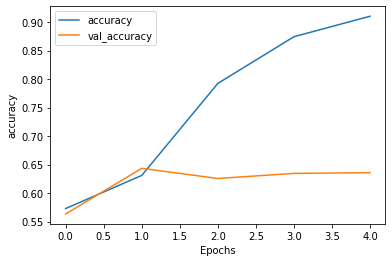

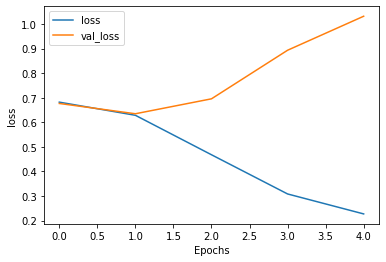

In [77]:
# LSTM Plots

graph_plots(history, "accuracy")
graph_plots(history, "loss")